# Evolving Prisoners Dilemma Players

In [4]:
#'T4T' = Tit-for-Tat (T4T) players, who start by cooperating and play the opponent’s last action in subsequent rounds.
#'G' = Grudger (G) players, who cooperate until the opponent defects, after which it only defects.
#'AC' = Always Cooperate (AC) players, who always cooperate.
#'AD' = Always Defect (AD) players, who always defect.

class Player:
    def __init__(self, pType):
        self.pType = pType
        self.payoff = 0
        self.oppLastMove = ""
    
    def setOppLastMove(self, a):
        if self.pType == "G":
            if self.oppLastMove == "D" or a == "D":
                self.oppLastMove = "D"
                return                
        
        self.oppLastMove = a
    def getOppLastMove(self):
        return self.oppLastMove
    
    def resetOppLastMove(self):
        self.oppLastMove = ""
    
    def addPayoff(self,p):
        self.payoff += p
    
    def resetPlayer(self):
        self.payoff = 0
        self.oppLastMove = ""
        
    def getPType(self):
        return self.pType
        

In [5]:
def getResponse(p1,m):
    if p1.getPType() == "T4T":
        if m == 0:
            return "C"
        
        return p1.getOppLastMove()
            
    elif p1.getPType() == "G":
        if p1.getOppLastMove() == "D":
            return "D"
        return "C"
    
    elif p1.getPType() == "AC":
        return "C"
    
    elif p1.getPType() == "AD":
        return "D"
    
def doPrisonersDilemma(p1,p2,m,payoffs):
    #print()
    #print("Battle!")
    #print(p1.getPType(),p2.getPType())
    for i in range(m):
        results = (getResponse(p1,i),getResponse(p2,i))
        p1.setOppLastMove(results[1])
        p2.setOppLastMove(results[0])
        #calculate payoff
        resultPayoff = payoffs[results] 
        p1.addPayoff(resultPayoff[0])
        p2.addPayoff(resultPayoff[1])
        #print(results)
    p1.resetOppLastMove()
    p2.resetOppLastMove()
    #print(p1.payoff,p2.payoff)

In [88]:
from itertools import combinations 
import operator
import random

random.seed(42)
def EvolvePrisonersDilemaPlayers(playerCounts,m,p,k,payoffs):
    allValues = []
    
    n = sum(playerCounts)
    
    #create initial population
    population = []
    
    playerCreated = True
    lastPopCount = -1
    while(playerCreated):
        if playerCounts[0] != 0:
            population.append(Player('T4T'))
            playerCounts[0] -= 1
        
        if playerCounts[1] != 0:
            population.append(Player('G'))
            playerCounts[1] -= 1
        if playerCounts[2] != 0:
            population.append(Player('AC'))
            playerCounts[2] -= 1
        if playerCounts[3] != 0:
            population.append(Player('AD'))
            playerCounts[3] -= 1
        if lastPopCount == len(population):
            playerCreated = False
        lastPopCount = len(population)
            
    battlesRun = 0
    
    
    file = open("PrisonerOutput.txt","w+")
    for generation in range(k):
        #get battle combinations
        comb = combinations(population, 2) 
        
        #run all combinations of battles
        for i in list(comb): 
            doPrisonersDilemma(i[0],i[1],m,payoffs)
            battlesRun +=1
            
        #sorted version population by payoffs
        sorted_pop = sorted(population, key=operator.attrgetter('payoff'),reverse=True)
        
        #output data
        groups = dict()
        groups["T4T"] = 0
        groups["G"] = 0
        groups["AC"] = 0
        groups["AD"] = 0
        
        popPayoffs = dict()
        popPayoffs["T4T"] = 0
        popPayoffs["G"] = 0
        popPayoffs["AC"] = 0
        popPayoffs["AD"] = 0
        
        avgPayoffs = dict()
        avgPayoffs["T4T"] = 0
        avgPayoffs["G"] = 0
        avgPayoffs["AC"] = 0
        avgPayoffs["AD"] = 0
        
        #calculating values
        totalPayoff = 0
        for i in sorted_pop:
            if i.pType not in groups:
                groups[i.pType] = 0
            if i.pType not in popPayoffs:
                popPayoffs[i.pType] = 0
            
            groups[i.pType] +=1
            popPayoffs[i.pType] += i.payoff
            
            totalPayoff += i.payoff
        
        for i in avgPayoffs.keys():
            if groups[i] != 0:
                avgPayoffs[i] = popPayoffs[i]/groups[i]
            else:
                avgPayoffs[i] = 0
        
        #adding to matrix for graphing
        allValues.append((generation,groups,popPayoffs,totalPayoff,avgPayoffs))
        
        #print groupings
        genText = "Gen " + str(generation) + "\n"
        percentOfPop = "Pop%- T4T: " + str(round(groups["T4T"]/n*100,2)) + "%   G: " + str(round(groups["G"]/n*100,2))+ "%   AC: " + str(round(groups["AC"]/n*100,2)) + "%   AD: " + str(round(groups["AD"]/n*100,2)) + "%\n" 
        sumPayoff = "Sum Payoffs- T4T: " + str(popPayoffs["T4T"]) + "   G: " + str(popPayoffs["G"])+ "   AC: " + str(popPayoffs["AC"]) + "   AD: " + str(popPayoffs["AD"]) + "   Total: " + str(totalPayoff) + "\n" 
        avgPayoffText = "Avg Payoffs- T4T: " + str(round(avgPayoffs["T4T"],3)) + "   G: " + str(round(avgPayoffs["G"],3))+ "   AC: " + str(round(avgPayoffs["AC"],3)) + "   AD: " + str(round(avgPayoffs["AD"],3))+ "\n" 
        print(genText + percentOfPop + sumPayoff + avgPayoffText)
        
        # add them to output file
        file.write(genText + percentOfPop + sumPayoff + avgPayoffText + "\n")
        
        #remove lowest p%
        numToReplace = int(int(p)/100 * n)
        sorted_pop = sorted_pop[0:-1 * numToReplace]
        
        #adding players from top p% without random replacement
        for i in range(numToReplace):
            sorted_pop.append(Player(sorted_pop[i].pType))
        
        #shuffle New Population
        random.shuffle(sorted_pop)
        
        nextPop = [Player(x.pType) for x in sorted_pop]
        
        population = nextPop.copy()
        
        ''' #Removed this to instead randomize the population as i was seeing odd happenings due to population ordering
        #resetting payoffs
        for i in sorted_pop:
            #print(i.pType,i.payoff)
            i.resetPlayer()
        population = sorted_pop
        '''
    print("Battles Run:", battlesRun)
    file.close()
    
    return allValues
    
    
payoffs = dict()
payoffs[("C","C")] = (3,3)
payoffs[("D","C")] = (5,0)
payoffs[("C","D")] = (0,5)
payoffs[("D","D")] = (1,1)

#              T4T,G,AC,AD
numPlayers = [25,25,25,25]
#numPlayers = [15,15,69,1]

allValues = EvolvePrisonersDilemaPlayers(numPlayers,5,20,20,payoffs)

Gen 0
Pop%- T4T: 25.0%   G: 25.0%   AC: 25.0%   AD: 25.0%
Sum Payoffs- T4T: 30250   G: 30250   AC: 27750   AD: 29875   Total: 118125
Avg Payoffs- T4T: 1210.0   G: 1210.0   AC: 1110.0   AD: 1195.0

Gen 1
Pop%- T4T: 35.0%   G: 35.0%   AC: 5.0%   AD: 25.0%
Sum Payoffs- T4T: 42350   G: 42350   AC: 5550   AD: 21875   Total: 112125
Avg Payoffs- T4T: 1210.0   G: 1210.0   AC: 1110.0   AD: 875.0

Gen 2
Pop%- T4T: 44.0%   G: 46.0%   AC: 5.0%   AD: 5.0%
Sum Payoffs- T4T: 62920   G: 65780   AC: 7050   AD: 4775   Total: 140525
Avg Payoffs- T4T: 1430.0   G: 1430.0   AC: 1410.0   AD: 955.0

Gen 3
Pop%- T4T: 46.0%   G: 54.0%   AC: 0.0%   AD: 0.0%
Sum Payoffs- T4T: 68310   G: 80190   AC: 0   AD: 0   Total: 148500
Avg Payoffs- T4T: 1485.0   G: 1485.0   AC: 0   AD: 0

Gen 4
Pop%- T4T: 46.0%   G: 54.0%   AC: 0.0%   AD: 0.0%
Sum Payoffs- T4T: 68310   G: 80190   AC: 0   AD: 0   Total: 148500
Avg Payoffs- T4T: 1485.0   G: 1485.0   AC: 0   AD: 0

Gen 5
Pop%- T4T: 48.0%   G: 52.0%   AC: 0.0%   AD: 0.0%
Sum Pay

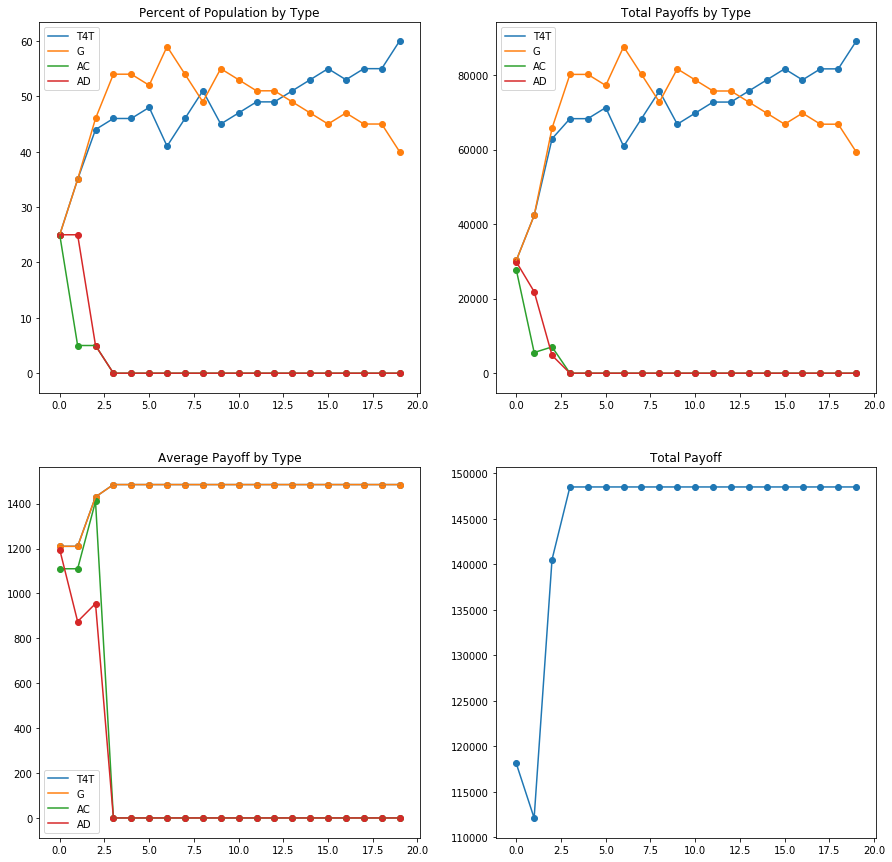

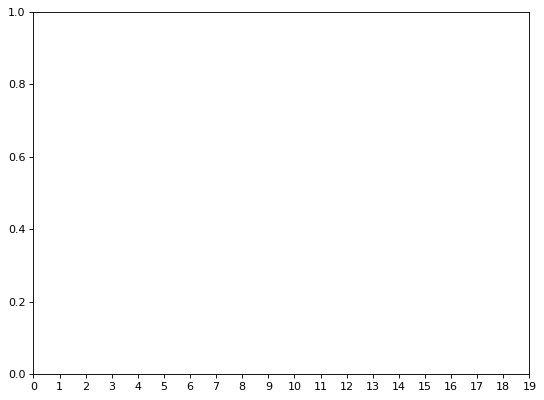

In [89]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


def makePlots(allValues):
    fig, axs = plt.subplots(2, 2,figsize=(15,15))
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    #group percentages
    x = [l[0] for l in allValues]
    y = [l[1] for l in allValues]
    yT4T =[i["T4T"] for i in y]
    yG =[i["G"] for i in y]
    yAC =[i["AC"] for i in y]
    yAD =[i["AD"] for i in y]
    
    axs[0,0].plot(x,yT4T, label = "T4T")
    axs[0,0].scatter(x,yT4T)
    axs[0,0].plot(x,yG, label = "G")
    axs[0,0].scatter(x,yG)
    axs[0,0].plot(x,yAC, label = "AC")
    axs[0,0].scatter(x,yAC)
    axs[0,0].plot(x,yAD, label = "AD")
    axs[0,0].scatter(x,yAD)
    axs[0,0].set_title('Percent of Population by Type')
    plt.xticks(range(0,allValues[-1][0]+1))
    axs[0,0].legend() 
    #axs[0,0].show()
    
    #Total Payoffs
    x = [l[0] for l in allValues]
    y = [l[2] for l in allValues]
    yT4T =[i["T4T"] for i in y]
    yG =[i["G"] for i in y]
    yAC =[i["AC"] for i in y]
    yAD =[i["AD"] for i in y]
    
    axs[0,1].plot(x,yT4T, label = "T4T")
    axs[0,1].scatter(x,yT4T)
    axs[0,1].plot(x,yG, label = "G")
    axs[0,1].scatter(x,yG)
    axs[0,1].plot(x,yAC, label = "AC")
    axs[0,1].scatter(x,yAC)
    axs[0,1].plot(x,yAD, label = "AD")
    axs[0,1].scatter(x,yAD)
    axs[0,1].set_title('Total Payoffs by Type')
    plt.xticks(range(0,allValues[-1][0]+1))
    axs[0,1].legend()
    #axs[0,1].show()
    
    #Average Payoff
    x = [l[0] for l in allValues]
    y = [l[4] for l in allValues]
    yT4T =[i["T4T"] for i in y]
    yG =[i["G"] for i in y]
    yAC =[i["AC"] for i in y]
    yAD =[i["AD"] for i in y]
    
    axs[1,0].plot(x,yT4T, label = "T4T")
    axs[1,0].scatter(x,yT4T)
    axs[1,0].plot(x,yG, label = "G")
    axs[1,0].scatter(x,yG)
    axs[1,0].plot(x,yAC, label = "AC")
    axs[1,0].scatter(x,yAC)
    axs[1,0].plot(x,yAD, label = "AD")
    axs[1,0].scatter(x,yAD)
    axs[1,0].set_title('Average Payoff by Type')
    plt.xticks(range(0,allValues[-1][0]+1))
    axs[1,0].legend()
    #axs[1,0].show()
    
    #Total payoff
    x = [l[0] for l in allValues]
    y = [l[3] for l in allValues]
    axs[1,1].plot(x,y)
    axs[1,1].scatter(x,y)
    axs[1,1].set_title('Total Payoff')
    plt.xticks(range(0,allValues[-1][0]+1))
    fig.savefig('AllPlots.png')
    
    plt.show()
makePlots(allValues)
